<a href="https://colab.research.google.com/github/rahmanS1d1q/churn-prediction-telco-customers/blob/main/Predicting_Customer_Churn_in_SaaS_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Get Data From Kaggle**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [3]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Cleaning data**

In [4]:
import pandas as pd
import numpy as np


# ===========================
# 1. Drop kolom yang tidak berguna
# ===========================
df.drop(columns=['customerID'], inplace=True)

# ===========================
# 2. Konversi 'TotalCharges' ke float
# ===========================
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# ===========================
# 3. Tangani missing values
# ===========================
# Cek missing
print(df.isnull().sum())
# Isi NaN di 'TotalCharges' dengan median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# ===========================
# 4. Encoding target variable 'Churn'
# ===========================
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# ===========================
# 5. Pisahkan kolom kategorikal & numerik
# ===========================
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('Churn')  # pastikan target tidak ikut

# ===========================
# 6. Encoding kolom kategorikal (One-Hot Encoding)
# ===========================
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# ===========================
# 7. Standarisasi (Optional, untuk modeling)
# ===========================
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# ===========================
# Final Check
# ===========================
print("\n✅ Data Siap Digunakan!")
print(df_encoded.shape)
df_encoded.head()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


/tmp/ipython-input-4-3020466537.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)



✅ Data Siap Digunakan!
(7043, 31)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,-1.277445,-1.160323,-0.994242,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,-0.439916,0.066327,-0.259629,-0.173244,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,-0.439916,-1.236724,-0.362660,-0.959674,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,-0.439916,0.514251,-0.746535,-0.194766,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,-0.439916,-1.236724,0.197365,-0.940470,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


# **Ekplorasi Data Analys**

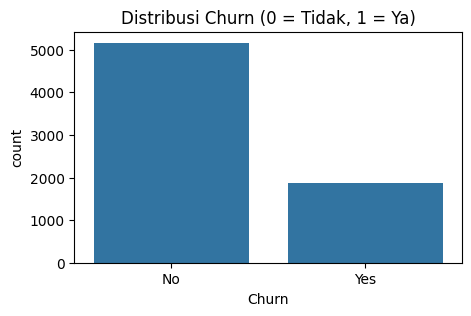

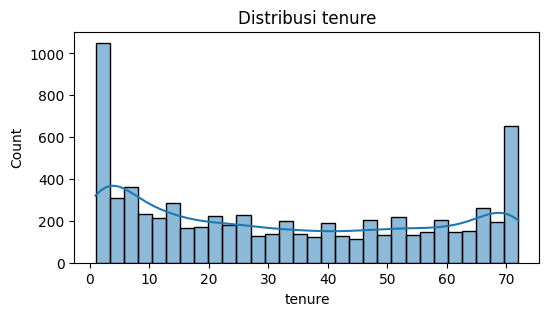

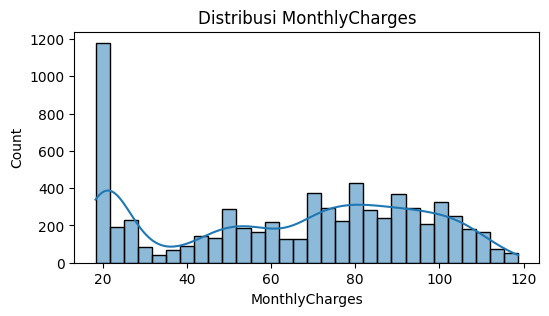

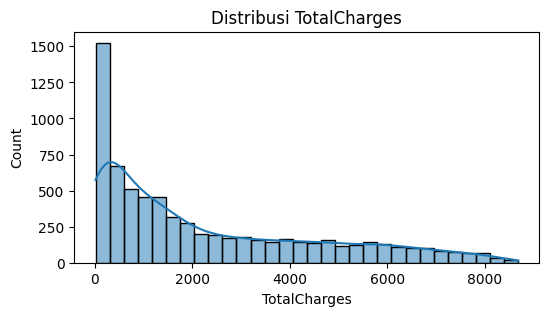

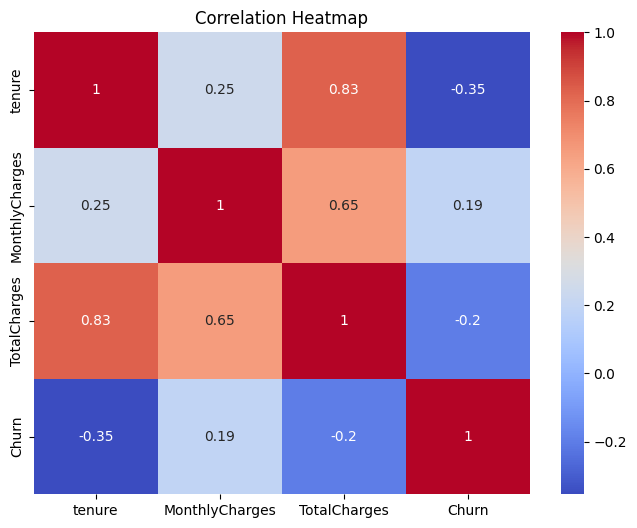

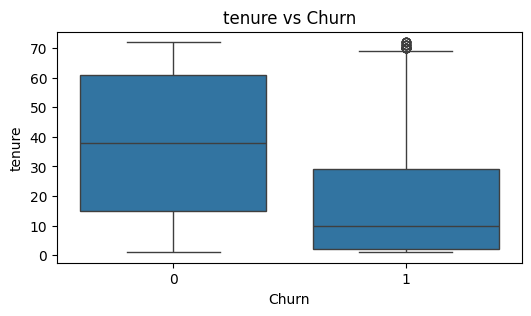

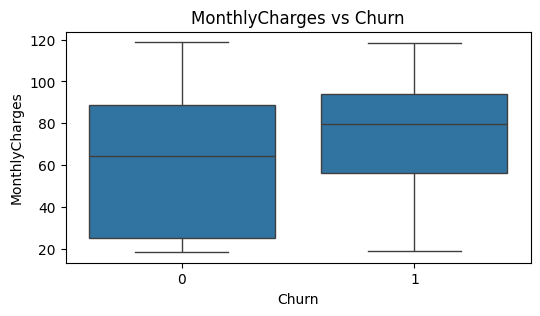

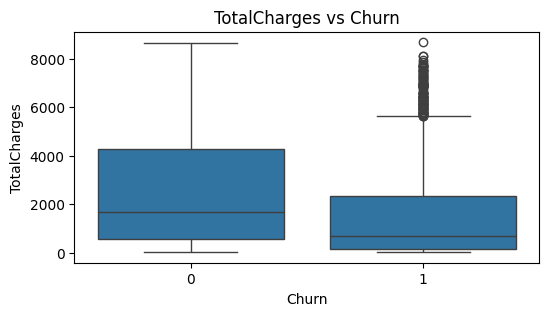

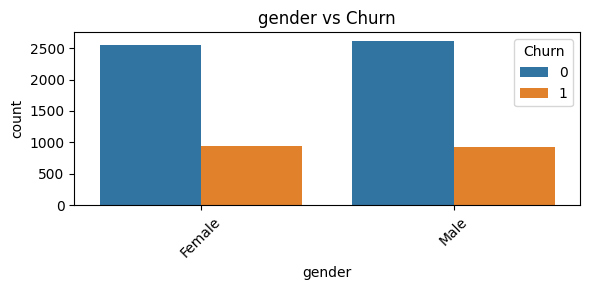

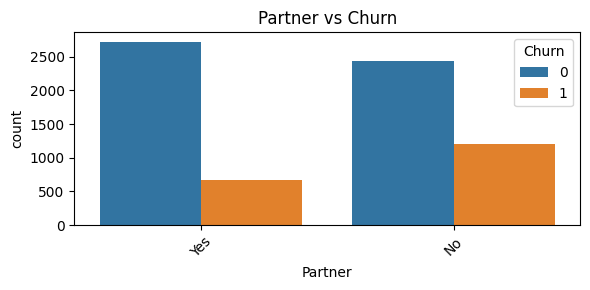

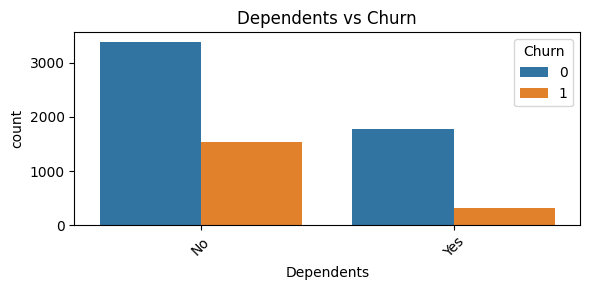

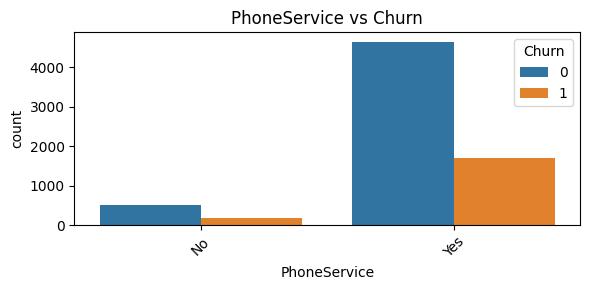

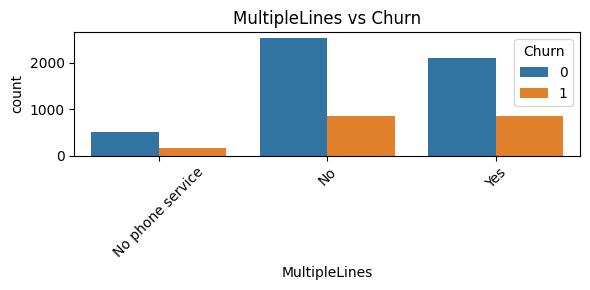

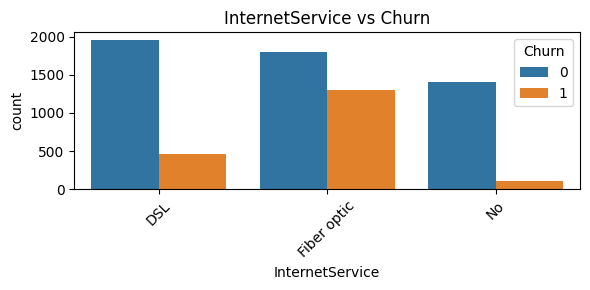

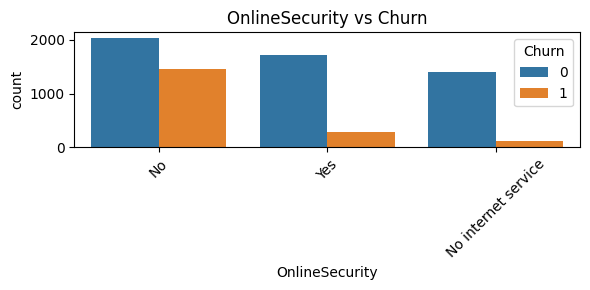

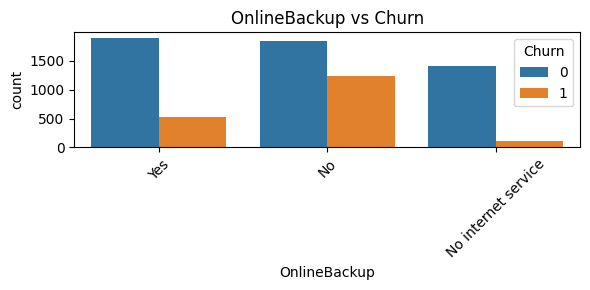

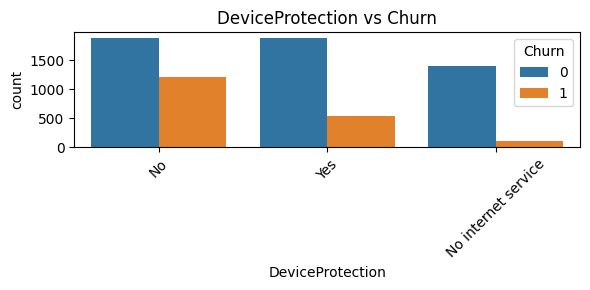

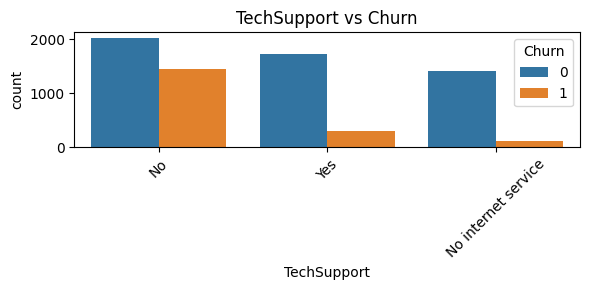

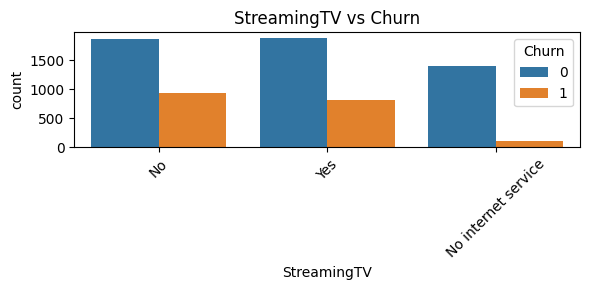

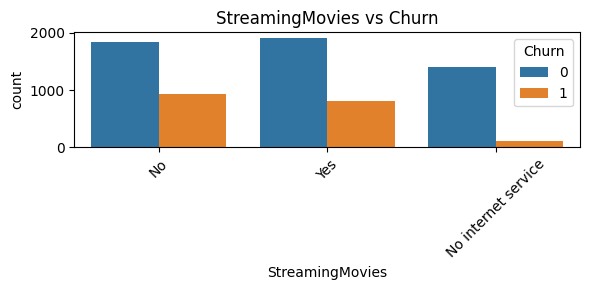

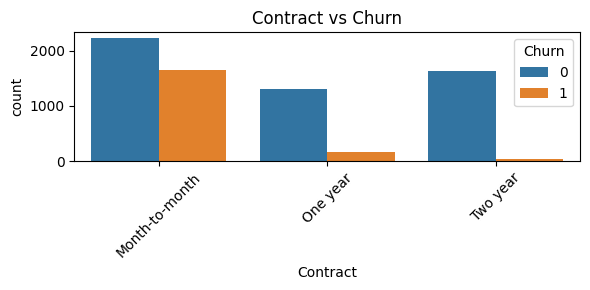

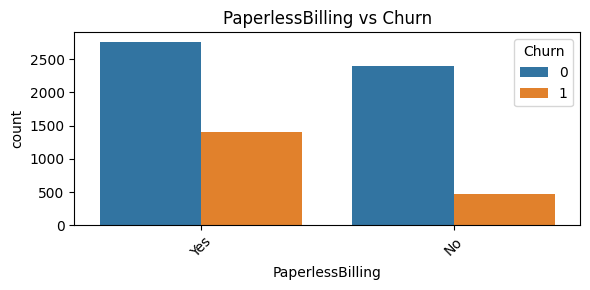

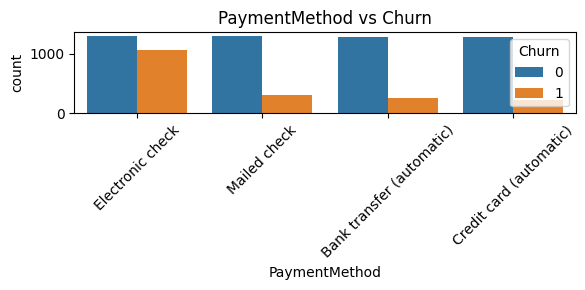

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Preprocessing ringan
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.dropna(subset=['TotalCharges'], inplace=True)
df.drop(columns=['customerID'], inplace=True)

# ===============================
# Distribusi Target: Churn
# ===============================
plt.figure(figsize=(5, 3))
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Churn (0 = Tidak, 1 = Ya)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# ===============================
# Distribusi Numerik
# ===============================
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.show()

# ===============================
# Korelasi
# ===============================
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols + ['Churn']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ===============================
# Boxplot Numerik vs Churn
# ===============================
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

# ===============================
# Kategorikal vs Churn
# ===============================
cat_cols = df.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# **Refine Data**

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load data
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2. Drop kolom ID yang tidak relevan
df.drop(columns=['customerID'], inplace=True)

# 3. Konversi TotalCharges ke numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 4. Buang baris yang memiliki nilai NaN
df.dropna(inplace=True)

# 5. Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 6. Identifikasi kolom kategorikal & numerik
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# 7. One-hot encoding untuk kolom kategorikal
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 8. Scaling fitur numerik
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# 9. Pisahkan fitur dan target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# 10. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 11. Cek hasil
print("✅ Refine selesai! Data siap untuk modeling.")
print("Shape X_train:", X_train.shape)
print("Shape X_test :", X_test.shape)
print("Jumlah fitur :", X.shape[1])


✅ Refine selesai! Data siap untuk modeling.
Shape X_train: (5625, 30)
Shape X_test : (1407, 30)
Jumlah fitur : 30
